In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# Выводим датасет, содержащий название песни, артиста, жанра и текста
df_songs = pd.read_csv("C:/Users/Admin/Downloads/Для курсовой/all_lyrics.csv")
df_songs.rename(columns = {"type" : "Genres", "lyrics" : "Lyric"}, inplace = True)
df_songs

,song,artist,Genres,Lyric
0,Stairway to Heaven,Led Zeppelin,rock,Stairway to Heaven Lyrics[Intro]\n\n[Verse 1]\...
1,Hey Jude,Beatles,rock,Hey Jude Lyrics[Verse 1: Paul McCartney]\nHey ...
2,All Along the Watchtower,"Hendrix, Jimi",rock,"Ii. Tambourine Lyrics[Chorus, sung]\nHey, Pip,..."
3,Satisfaction,Rolling Stones,rock,"Sin título I Lyrics[Letra de ""Sin título I""]\n..."
4,Like A Rolling Stone,"Dylan, Bob",rock,Like a Rolling Stone Lyrics[Verse 1]\nOnce upo...
...,...,...,...,...
3995,Motown 25,Elzhi,rap & hip hop,Motown 25 Lyrics[Verse 1: eLZhi]\nI end career...
3996,How Ya Like Me Now,Kool Moe Dee,rap & hip hop,"How Ya Like Me Now Lyrics""All aboard for the n..."
3997,Coastin’,Zion I feat. K.Flay,rap & hip hop,Coastin’ LyricsWhen life brings trouble\nYou c...
3998,Head Banger,EPMD,rap & hip hop,Headbanger Lyrics[Redman]\nNegroes!!!!!!!!\n\n...


In [3]:
df_songs.count() # Количество значений в каждом атрибуте

song      4000
artist    4000
Genres    4000
Lyric     3896
dtype: int64

In [4]:
# Описательная статистика
print(df_songs.describe())

              song   artist Genres  \
count         4000     4000   4000   
unique        3881     1583      4   
top     Summertime  Beatles   rock   
freq             5       51   1000   

                                                    Lyric  
count                                                3896  
unique                                               3761  
top     Summer Country Songs LyricsA\nAaron Lewis – "E...  
freq                                                   10  


In [5]:
df_songs.value_counts('Genres') # Количество песен в каждом жанре

Genres
R&B              1000
country          1000
rap & hip hop    1000
rock             1000
dtype: int64

In [6]:
df_songs.nunique() # Количество уникальных значений в каждом атрибуте

song      3881
artist    1583
Genres       4
Lyric     3761
dtype: int64

In [7]:
# Разбиение строк в столбце Genres по разделителю ";"
for i in range(0,len(df_songs.axes[0])):
    x = df_songs.Genres[i]
    for j in range(0,len(x)):
        if(x[j] == ';'):
            x = x[0:j]
            df_songs.Genres[i] = x
            break
df_songs.Genres

0                rock
1                rock
2                rock
3                rock
4                rock
            ...      
3995    rap & hip hop
3996    rap & hip hop
3997    rap & hip hop
3998    rap & hip hop
3999    rap & hip hop
Name: Genres, Length: 4000, dtype: object

In [8]:
# Провека на пустые значения
for col_name in df_songs.columns:
    print(f"Column Name: {col_name}")
    print(df_songs[col_name].isnull().sum(), df_songs[col_name].dtype)
    print("-----------------")

Column Name: song
0 object
-----------------
Column Name: artist
0 object
-----------------
Column Name: Genres
0 object
-----------------
Column Name: Lyric
104 object
-----------------


<AxesSubplot:>

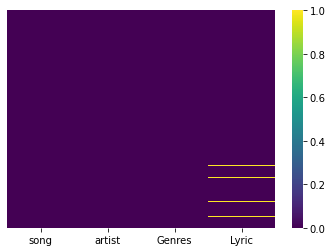

In [9]:
sns.heatmap(df_songs.isnull(),yticklabels=False,cbar=True,cmap='viridis') # Визуализируем пустые значения

In [10]:
# Удаление пропущенных строк в столбце Lyric
arr = []
for i in range(0,4000):
    if(type(df_songs.Lyric[i]) == float):
        arr.append(df_songs.song[i])
for i in arr:
    df_songs = df_songs.drop(df_songs[df_songs.song  ==  i].index)

In [11]:
# Повторная провека на пустые значения
for col_name in df_songs.columns:
    print(f"Column Name: {col_name}")
    print(df_songs[col_name].isnull().sum(), df_songs[col_name].dtype)
    print("-----------------")

Column Name: song
0 object
-----------------
Column Name: artist
0 object
-----------------
Column Name: Genres
0 object
-----------------
Column Name: Lyric
0 object
-----------------


In [12]:
# Проверка данных об определенном артисте
df_songs.loc[df_songs['artist'] == 'Eminem']

,song,artist,Genres,Lyric
3010,Infinite,Eminem,rap & hip hop,Infinite Lyrics[Produced by Mr. Porter & Jeff ...
3035,Lose Yourself,Eminem,rap & hip hop,"Lose Yourself Lyrics[Intro]\nLook, if you had ..."
3187,Drug Ballad,Eminem,rap & hip hop,Drug Ballad Lyrics[Intro: Eminem & Dina Rae]\n...
3250,"Murder, Murder",Eminem,rap & hip hop,Murder Murder Lyrics[Scratches: DJ Lenn Swann]...
3361,It’s Ok,Eminem,rap & hip hop,It’s O.K. Lyrics[Intro: Proof & Eminem]\nCheck...
3393,Sing For The Moment,Eminem,rap & hip hop,Sing for the Moment Lyrics[Verse 1: Eminem]\nT...
3417,Brain Damage,Eminem,rap & hip hop,Brain Damage Lyrics[Intro: Doctor & Nurse]\nSc...
3549,Superman,Eminem,rap & hip hop,Superman Lyrics[Intro: Eminem & Dina Rae]\nMhm...
3569,Rock Bottom,Eminem,rap & hip hop,Rock Bottom Lyrics[Produced by Bass Brothers]\...
3673,Tonight (1996),Eminem,rap & hip hop,The 500 Greatest Albums of All Time (2003) Lyr...


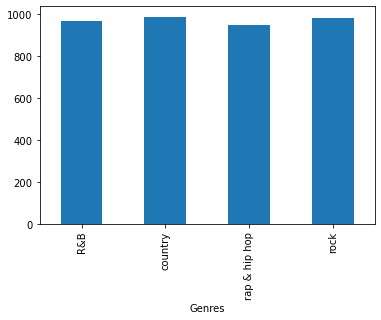

In [13]:
# Визуализируем количества песен в каждом жанре
fig = plt.figure()
df_songs.groupby('Genres').Genres.count().plot.bar(ylim=0)
plt.show()

In [14]:
# Создание словаря с жанрами
x = df_songs.Genres.unique()

songs_idx = {}
idx_to_songs = {}
j = 0
for i in x:
    songs_idx[i] = j
    idx_to_songs[j] = i
    j += 1
    
print(songs_idx)

{'rock': 0, 'country': 1, 'R&B': 2, 'rap & hip hop': 3}


In [15]:
# создание нового столбца, содержащего id каждого жанра 
genre_arr = df_songs.Genres.map(songs_idx)
df_songs['category_id'] = genre_arr
df_songs.sample(5)

,song,artist,Genres,Lyric,category_id
2172,Tender Lover,Babyface,R&B,Tender Lover LyricsFeels good\nEverybody\n\nTe...,2
2499,Baby,Brandy,R&B,"FRIEND Lyrics[Testo di ""FRIEND"" ft. Geolier & ...",2
877,I Know I'm Losing You,Rare Earth,rock,(I Know) I’m Losing You Lyrics[Intro]\nYour lo...,0
1797,American kids,Kenny Chesney,country,2015 Nominees LyricsSong of the YearMeghan Tra...,1
2907,La La means I love you,Delfonics,R&B,La La Means I Love You Lyrics[Verse 1]\nMany g...,2


In [16]:
# создание отдельного датасета с жанром и id жанра
category_id_df = df_songs[['Genres', 'category_id']].drop_duplicates()
category_id_df

,Genres,category_id
0,rock,0
1000,country,1
2000,R&B,2
3001,rap & hip hop,3


In [17]:
# создание векторов признаков для каждой строки в столбце Lyric
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
lyrics_vector = tfidf.fit_transform(df_songs.Lyric).toarray()
labels = df_songs.category_id
lyrics_vector.shape

(3888, 47448)

In [18]:
N = 50 # устанавливание количество наиболее связанных признаков
for genre, category_id in sorted(songs_idx.items()):
    features_chi2 = chi2(lyrics_vector, labels == category_id) # вычисление хи-квадрат для каждого признака
    indices = np.argsort(features_chi2[0]) # сортировка индексов признаков в порядке возрастания значений хи-квадрат.
    feature_names = np.array(tfidf.get_feature_names())[indices] # получение имен признаков в порядке возрастания значений хи-квадрат
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1] # создание списка уникальных (одиночных) признаков (униграмм).
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2] # создание списка двойных признаков (биграмм).
  
    print("\n-- %s:" %(genre))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


-- R&B:
  * Most Correlated Unigrams are: woo, mc, kendricks, beyoncé, money, kid, country, solo, gun, kill, road, town, ass, du, black, need, fuck, streets, shot, affair, mmmm, oo, tammi, chilli, lovin, big, mmm, roll, boz, want, yeah, babe, feel, shoo, shit, guitar, pre, old, wanna, hey, nigga, niggas, whoa, oooh, groove, love, girl, oh, ooh, baby
  * Most Correlated Bigrams are: wanna wanna, la la, baby need, wanna oh, mind baby, oooh oooh, want baby, baby know, need need, baby yeah, let let, just wanna, let know, hey baby, love right, girl don, love yeah, baby chorus, ooh oh, woman woman, yeah baby, baby let, oh yeah, yes baby, baby wanna, make love, want need, know love, love sweet, love ooh, love make, oh girl, make feel, baby just, right baby, tell tell, yeah yeah, girl know, baby ooh, hey hey, love oh, baby love, baby oh, ooh baby, ooh ooh, love baby, love love, baby baby, oh oh, oh baby

-- country:
  * Most Correlated Unigrams are: strait, paisley, county, hick, bottle, blue

In [19]:
X = df_songs['Lyric'] # признаки
Y = df_songs['Genres'] # целевая переменная

In [20]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

In [21]:
print(Y.unique())

['rock' 'country' 'R&B' 'rap & hip hop']


In [22]:
# список моделей, которые будут использоваться для классификации текста
models = [
    LinearSVC(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, lyrics_vector, labels, scoring='accuracy', cv=CV) #  выполнение кросс-валидации для текущей модели и получение точности (accuracy) для каждой итерации
  for fold_idx, accuracy in enumerate(accuracies): # перебирание всех итераций кросс-валидации и точности, полученные для текущей модели
    entries.append((model_name, fold_idx, accuracy)) # добавление результатов кросс-валидации для текущей модели в список entries
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy']) # создание DataFrame на основе списка entries с указанными названиями столбцов

In [23]:
# вычисление среднего значения и стандартного отклонения точности (accuracy) для каждой модели
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
print(acc)

                    Mean Accuracy  Standard deviation
model_name                                           
LinearSVC                0.778026            0.019324
LogisticRegression       0.774169            0.017444


In [24]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(lyrics_vector, labels, df_songs.index, test_size=0.25, random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df_songs['Genres'].unique()))

				CLASSIFICATIION METRICS

               precision    recall  f1-score   support

         rock       0.71      0.61      0.66       256
      country       0.76      0.78      0.77       258
          R&B       0.69      0.70      0.69       231
rap & hip hop       0.86      0.96      0.90       227

     accuracy                           0.76       972
    macro avg       0.75      0.76      0.76       972
 weighted avg       0.75      0.76      0.75       972



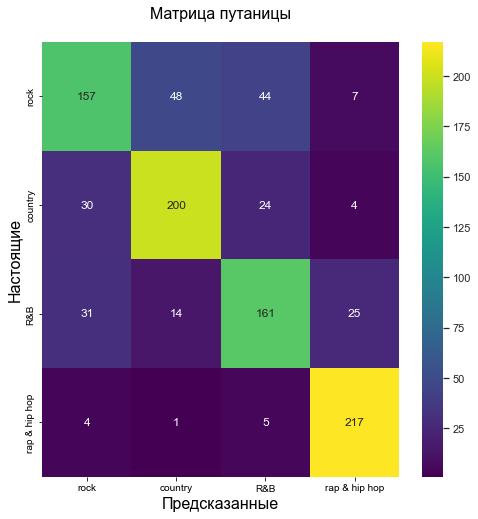

In [26]:
# создание тепловой карты матрицы ошибок
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.heatmap(conf_mat, annot=True, cmap="viridis", fmt='d',
            xticklabels=category_id_df.Genres.values, 
            yticklabels=category_id_df.Genres.values)
plt.ylabel('Настоящие', size=16)
plt.xlabel('Предсказанные', size=16)


plt.title("Матрица путаницы\n", size=16);

In [27]:
conf_mat

array([[157,  48,  44,   7],
       [ 30, 200,  24,   4],
       [ 31,  14, 161,  25],
       [  4,   1,   5, 217]], dtype=int64)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 0) # разбиение данных на обучающую и тестовую выборки

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english') # преобразование текстовых данных в векторы признаков с помощью метода fit().

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train) # применяем метод transform() к обучающей выборке, чтобы получить tf-idf векторы признаков.

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train) # создание модели LinearSVC() и обучение ее на tf-idf векторах признаков и метках классов, используя метод fit().

In [30]:
df_songs.loc[df_songs['artist'] == 'Eminem']

,song,artist,Genres,Lyric,category_id
3010,Infinite,Eminem,rap & hip hop,Infinite Lyrics[Produced by Mr. Porter & Jeff ...,3
3035,Lose Yourself,Eminem,rap & hip hop,"Lose Yourself Lyrics[Intro]\nLook, if you had ...",3
3187,Drug Ballad,Eminem,rap & hip hop,Drug Ballad Lyrics[Intro: Eminem & Dina Rae]\n...,3
3250,"Murder, Murder",Eminem,rap & hip hop,Murder Murder Lyrics[Scratches: DJ Lenn Swann]...,3
3361,It’s Ok,Eminem,rap & hip hop,It’s O.K. Lyrics[Intro: Proof & Eminem]\nCheck...,3
3393,Sing For The Moment,Eminem,rap & hip hop,Sing for the Moment Lyrics[Verse 1: Eminem]\nT...,3
3417,Brain Damage,Eminem,rap & hip hop,Brain Damage Lyrics[Intro: Doctor & Nurse]\nSc...,3
3549,Superman,Eminem,rap & hip hop,Superman Lyrics[Intro: Eminem & Dina Rae]\nMhm...,3
3569,Rock Bottom,Eminem,rap & hip hop,Rock Bottom Lyrics[Produced by Bass Brothers]\...,3
3673,Tonight (1996),Eminem,rap & hip hop,The 500 Greatest Albums of All Time (2003) Lyr...,3


In [31]:
import random
# x = random.randint(0,3800)
x = 3035 # Eminem - Lose Yourself
lyrics = df_songs.Lyric[x];
print("Предсказанный жанр: ", model.predict(fitted_vectorizer.transform([lyrics]))) # предсказанное значение из обученной модели
print("Действительный жанр: ", df_songs.Genres[x]) # значение жанра из датасета

Предсказанный жанр:  ['rap & hip hop']
Действительный жанр:  rap & hip hop
